[51822.0, 52668.0, 52867.0, 59256.0, 59963.0, 60600.0, 64096.0, 62643.0, 63992.0, 63552.0, 56406.0, 52468.0]


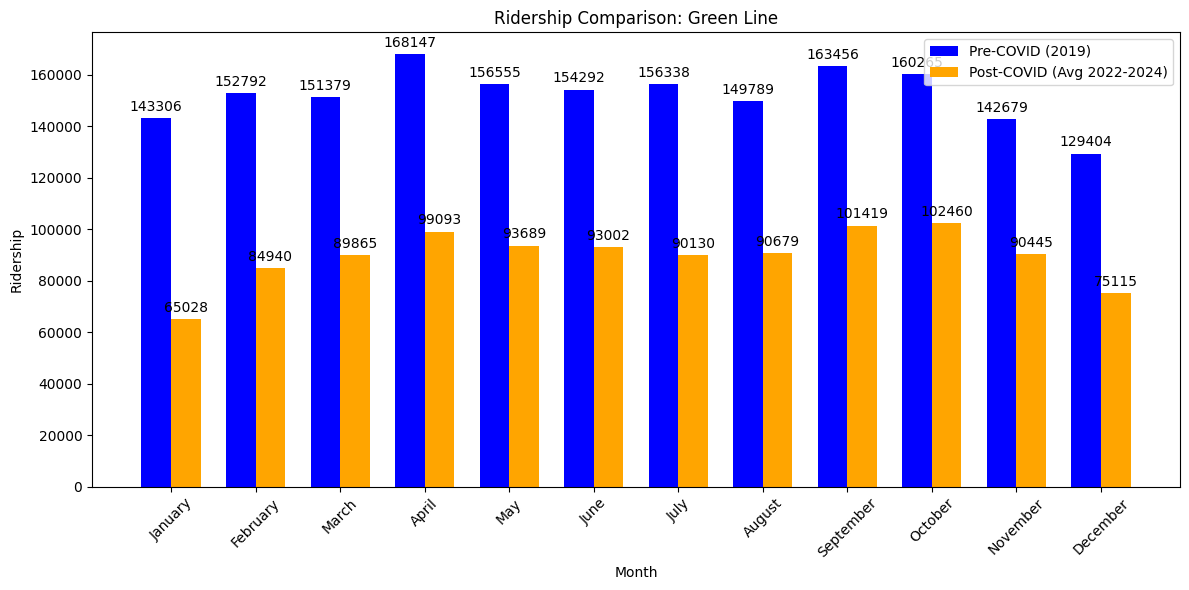

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MBTA_Monthly_Ridership.csv', low_memory=False )


df["Month"] = df["month_of_service"].astype(str).str[5:7]  # Extracts "MM" part

df["Year"] = df["month_of_service"].astype(str).str[0:4]
# Define month mapping
month_map = {
    "01": "January", "02": "February", "03": "March", "04": "April",
    "05": "May", "06": "June", "07": "July", "08": "August",
    "09": "September", "10": "October", "11": "November", "12": "December"
}

# Apply month name mapping
df["Month"] = df["Month"].map(month_map)

# Pivot table: Rows = Month, Columns = Route, Values = Average Ridership
pivot_table = df.pivot_table(index=("Month", "Year", "daytype"), columns="route_or_line", values="ridership_average")


def pivot_convert_individual(name, year, month, type, data):
    """
    This is primarily for 7 scores
    You have to input either a year or month not both to get data depending on which one you don't input
    

    Args:
        name (string): _description_
        year (string): _description_
        month (string): _description_
        type (string): _description_
        data (pivot): _description_

    Returns:
        _type_: _description_
    """
    
    #want quality info only looking at one measure
    years = [ "2019", '2020', '2021', '2022', '2023', '2024']
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    values = []
    
    if year == '' and month == '':
        return 
    
    if year == '':
        values = [(float(data.loc[(month, x, type), name])) for x in years]
        return values
    elif month == '':
        values =  [(float(data.loc[(x, year,  type), name ])) for x in months]
        return values
    else:
        values = float(data.loc[(month, year, type), name ])
    
    return values


months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
all_years = [ "2019", '2020', '2021', '2022', '2023', '2024']
years = ['2022', '2023', '2024']
mbta_lines = pivot_table.columns.tolist()
#test
value = pivot_convert_individual("Blue Line", '2019', '', 'Total', pivot_table)
print(value)

pre_covid = {}
post_covid = {}
for i in mbta_lines:
    pre_covid[i] = {}
    post_covid[i] = {}
    for j in months:
        pre_covid[i][j] = 0
        post_covid[i][j] = 0
        
sum = 0
for v in mbta_lines:
    for w in months:
        pre_covid[v][w] = pivot_convert_individual(v, '2019', w, "Total", pivot_table)

        

for x in mbta_lines:
    for y in years:
        for z in months:
            post_covid[x][z] += pivot_convert_individual(x, y, z, "Total", pivot_table )
    
    for i in months:
        post_covid[x][i] //= 3


def graph_by_line(line_name):
    """Plots pre-COVID vs post-COVID ridership for a specific line."""
    pre_values = [pre_covid[line_name][m] for m in months]
    post_values = [post_covid[line_name][m] for m in months]
    
    # Replace NaN with 0 (optional: could also filter out NaN months)
    pre_values = [0 if np.isnan(x) else x for x in pre_values]
    post_values = [0 if np.isnan(x) else x for x in post_values]
    
    x = np.arange(len(months))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, pre_values, width, label='Pre-COVID (2019)', color='blue')
    rects2 = ax.bar(x + width/2, post_values, width, label='Post-COVID (Avg 2022-2024)', color='orange')
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Ridership')
    ax.set_title(f'Ridership Comparison: {line_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(months, rotation=45)
    ax.legend()
    
    ax.bar_label(rects1, fmt='%.0f', padding=3)
    ax.bar_label(rects2, fmt='%.0f', padding=3)
    
    plt.tight_layout()
    plt.show()

graph_by_line("Green Line")

def desired_mbta_routes(list_of_lines):
    for x in list_of_lines:
        graph_by_line(x)
        
        
        
only_trains = ["Red Line", "Blue Line", "Green Line", "Orange Line", "Commuter Rail"]

After extracting and cleaning the data we will look at tests such as T-Test, Z-Test, and Interval Confidence

Null Hypothesis: 
There is no correlation between pre-covid vs covid vs post-covid years and ridership on the MBTA.

Alternate Hypothesis:
There is higher ridership on MBTA pre-covid vs decreased ridership post-covid.



